![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/webinars_conferences_etc/multi_lingual_webinar/1_NLU_base_features_on_dataset_with_YAKE_Lemma_Stemm_classifiers_NER_.ipynb)

# 1. Install NLU 

In [1]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash
import nlu

--2022-04-15 12:27:08--  https://setup.johnsnowlabs.com/nlu/colab.sh
Resolving setup.johnsnowlabs.com (setup.johnsnowlabs.com)... 51.158.130.125
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh [following]
--2022-04-15 12:27:08--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1665 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                     0%[                    ]       0  --.-KB/s               Installing  NLU 3.4.3rc2 with  PySpark 3.0.3 and Spark NLP 3.4.2 for Google Colab .

# Download dataset with major news about crypto currencies.
## We will use the 'title' column for our examples
https://www.kaggle.com/kashnitsky/news-about-major-cryptocurrencies-20132018-40k

![Crypto](http://ckl-it.de/wp-content/uploads/2021/02/crypto.jpeg )

In [2]:
import pandas as pd 
import nlu
!wget http://ckl-it.de/wp-content/uploads/2020/12/small_btc.csv 
df = pd.read_csv('/content/small_btc.csv').title
df

--2022-04-15 12:28:51--  http://ckl-it.de/wp-content/uploads/2020/12/small_btc.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22244914 (21M) [text/csv]
Saving to: ‘small_btc.csv’

small_btc.csv       100%[===================>]  21.21M  9.74MB/s    in 2.2s    

2022-04-15 12:28:53 (9.74 MB/s) - ‘small_btc.csv’ saved [22244914/22244914]



0          Bitcoin Price Update: Will China Lead us Down?
1       Key Bitcoin Price Levels for Week 51 (15 – 22 ...
2       National Australia Bank, Citing Highly Flawed ...
3       Chinese Bitcoin Ban Driven by  Chinese Banking...
4                   Bitcoin Trade Update: Opened Position
                              ...                        
1995    Bitcoin Bill Pay Company Living Room of Satosh...
1996    NYDFS Extends BitLicense Bitcoin Regulation Co...
1997    Bitfinex Passes Stefan Thomas’s Proof Of Solve...
1998    Cryptocurrency Exchange Platform AlphaPoint Pa...
1999    Want to Buy And Sell Bitcoin Fast and Secure? ...
Name: title, Length: 2000, dtype: object

# Predict Emotion of News Article titles

In [3]:
import nlu
# Predict sentiment on dataset with NLU sentiment model
emo_df = nlu.load('emotion').predict(df)
emo_df

classifierdl_use_emotion download started this may take some time.
Approximate size to download 21.3 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,emotion,emotion_confidence_confidence,sentence,sentence_embedding_use
0,fear,0.998173,Bitcoin Price Update: Will China Lead us Down?,"[0.05829371139407158, -0.036904484033584595, -..."
1,joy,0.997696,Key Bitcoin Price Levels for Week 51 (15 – 22 ...,"[0.038088250905275345, -0.04514157399535179, -..."
2,fear,0.999997,"National Australia Bank, Citing Highly Flawed ...","[0.05034318566322327, -0.01303655095398426, -0..."
3,fear,0.999135,Chinese Bitcoin Ban Driven by Chinese Banking ...,"[0.055152829736471176, -0.05237917602062225, -..."
4,joy,0.998864,Bitcoin Trade Update: Opened Position,"[0.05926975607872009, -0.056463420391082764, -..."
...,...,...,...,...
1996,fear,0.998281,NYDFS Extends BitLicense Bitcoin Regulation Co...,"[0.0639236643910408, -0.05505230277776718, -0...."
1997,fear,0.772052,Bitfinex Passes Stefan Thomas’s Proof Of Solve...,"[0.059178080409765244, -0.041498005390167236, ..."
1998,joy,0.999348,Cryptocurrency Exchange Platform AlphaPoint Pa...,"[0.05369672179222107, -0.023480931296944618, -..."
1999,fear,0.998905,Want to Buy And Sell Bitcoin Fast and Secure?,"[0.0626637190580368, -0.05945301055908203, -0...."


# Plot sentiment distribution

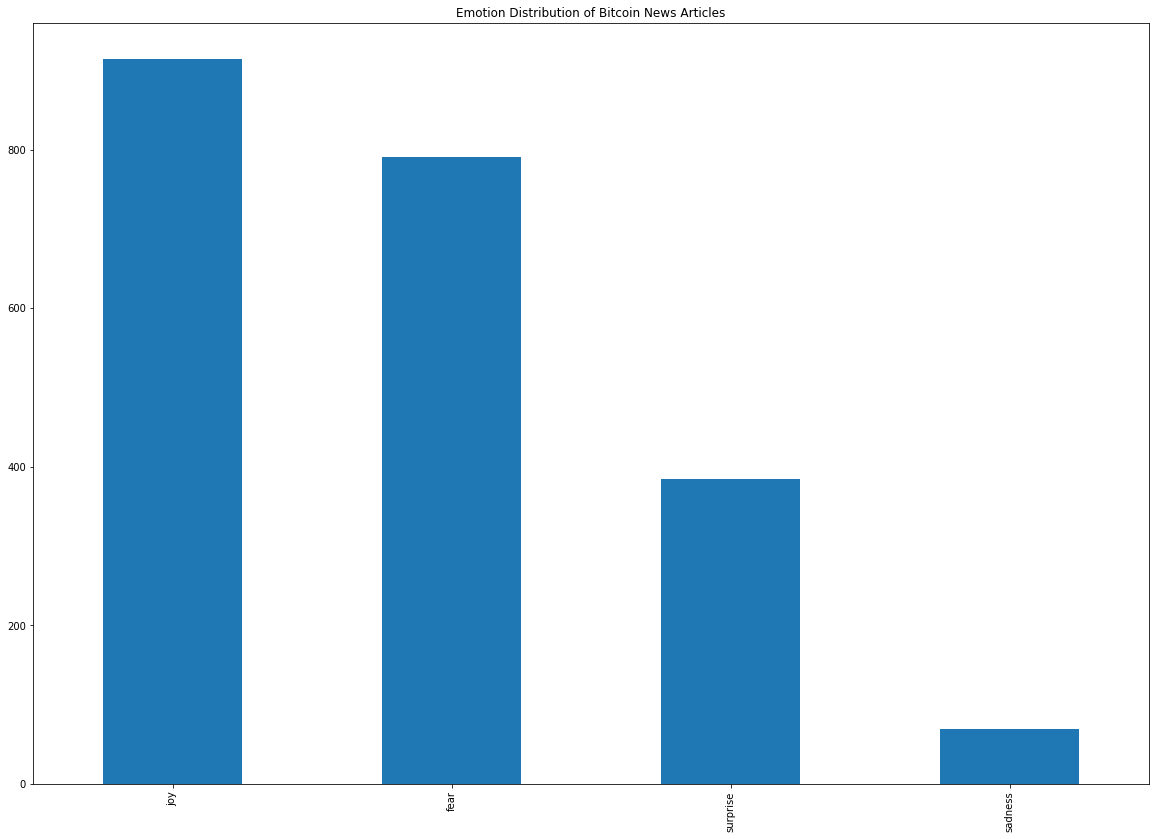

In [4]:
emo_df.emotion.value_counts().plot.bar(figsize=(20,14), title = 'Emotion Distribution of Bitcoin News Articles')

# Predict keywords occuring in dataset with YAKE

In [5]:
key_df = nlu.load('yake').predict(df)
key_df

sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,document,keywords,keywords_confidence
0,Bitcoin Price Update: Will China Lead us Down?,update,0.5798862558280943
0,Bitcoin Price Update: Will China Lead us Down?,china,0.5798862558280943
0,Bitcoin Price Update: Will China Lead us Down?,china lead,0.5066323531331214
1,Key Bitcoin Price Levels for Week 51 (15 – 22 ...,price,0.5798862558280943
1,Key Bitcoin Price Levels for Week 51 (15 – 22 ...,levels,0.5798862558280943
...,...,...,...
1998,Cryptocurrency Exchange Platform AlphaPoint Pa...,growth,0.26804494089513314
1998,Cryptocurrency Exchange Platform AlphaPoint Pa...,support growth,0.1840422979793308
1999,Want to Buy And Sell Bitcoin Fast and Secure? ...,bitcoin fast,0.3579604335906263
1999,Want to Buy And Sell Bitcoin Fast and Secure? ...,try coinrnr,0.2564243599387429


# Plot keyword Distribution
You need to call `.explode()` on the keyword column and then get the count of each keyword

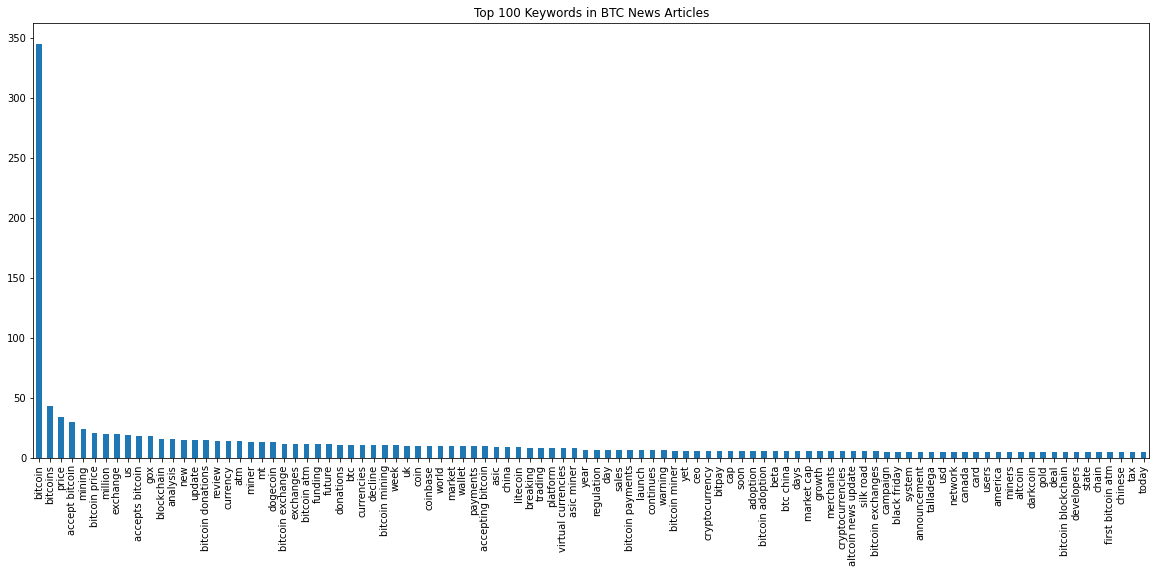

In [7]:
key_df.explode('keywords').keywords.value_counts()[0:100].plot.bar(title='Top 100 Keywords in BTC News Articles', figsize=(20,8))


# Stem Data with NLU
To reduce dimensionality of the data and yield better results with keyword extraction, we can apply the built in stemmer on our dataset. Especially to merge occurences of termns like `bitcoin` and `bitcoins`

Note, Lemmatizing and Normalizing could also applied for further dimension reduction, but they would noch fix the previously mentioned example

In [8]:
stem_df = nlu.load('stem').predict(df, output_level = 'document')
stem_df['stem_string'] = stem_df.stem.str.join(' ')
stem_df

,document,stem,stem_string
0,Bitcoin Price Update: Will China Lead us Down?,"[bitcoin, price, updat, :, will, china, lead, ...",bitcoin price updat : will china lead u down ?
1,Key Bitcoin Price Levels for Week 51 (15 – 22 ...,"[kei, bitcoin, price, level, for, week, 51, (,...",kei bitcoin price level for week 51 ( 15 – 22 ...
2,"National Australia Bank, Citing Highly Flawed ...","[nation, australia, bank, ,, cite, highli, fla...","nation australia bank , cite highli flawe data..."
3,Chinese Bitcoin Ban Driven by Chinese Banking ...,"[chines, bitcoin, ban, driven, by, chines, ban...",chines bitcoin ban driven by chines bank crisi ?
4,Bitcoin Trade Update: Opened Position,"[bitcoin, trade, updat, :, open, posit]",bitcoin trade updat : open posit
...,...,...,...
1995,Bitcoin Bill Pay Company Living Room of Satosh...,"[bitcoin, bill, pai, compani, live, room, of, ...",bitcoin bill pai compani live room of satoshi ...
1996,NYDFS Extends BitLicense Bitcoin Regulation Co...,"[nydf, extend, bitlicens, bitcoin, regul, comm...",nydf extend bitlicens bitcoin regul comment pe...
1997,Bitfinex Passes Stefan Thomas’s Proof Of Solve...,"[bitfinex, pass, stefan, thomas’, proof, of, s...",bitfinex pass stefan thomas’ proof of solvenc ...
1998,Cryptocurrency Exchange Platform AlphaPoint Pa...,"[cryptocurr, exchang, platform, alphapoint, pa...",cryptocurr exchang platform alphapoint partner...


# Stem+YAKE
We can see `bitcoins` is not a keyword anymore and added to the `bitcoin` count including a lot of other occurences of Bitcoin in the dataset.

sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


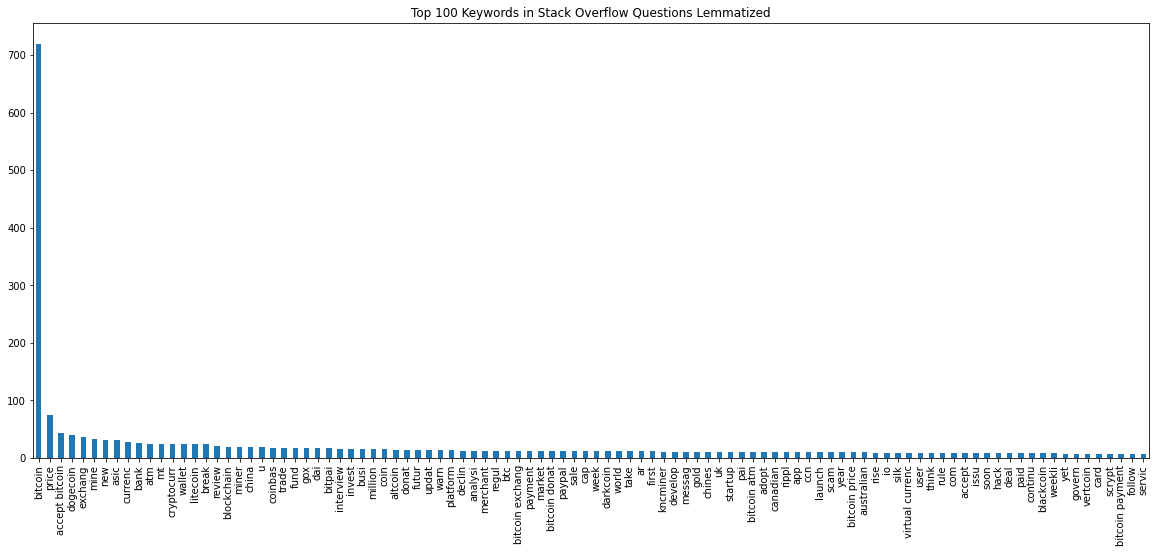

In [9]:

stem_df = nlu.load('yake').predict(stem_df.stem_string)
stem_df.explode('keywords').keywords.value_counts()[0:100].plot.bar(title='Top 100 Keywords in Stack Overflow Questions Lemmatized', figsize=(20,8))

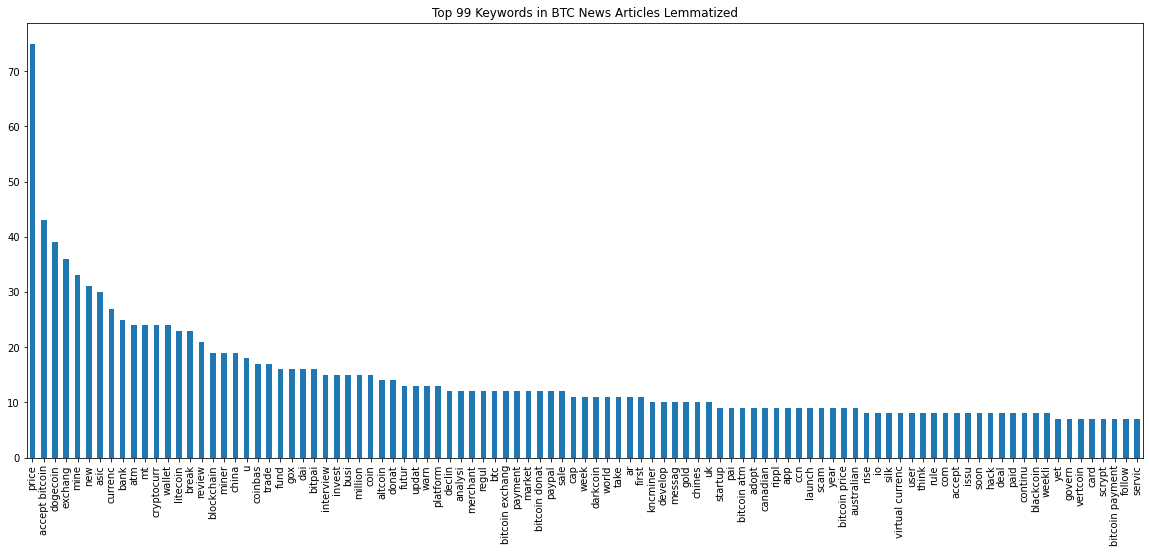

In [10]:
stem_df.explode('keywords').keywords.value_counts()[1:100].plot.bar(title='Top 99 Keywords in BTC News Articles Lemmatized', figsize=(20,8))


# Configure Yake to yield longer keywords
- `setNKeywords` to increase number of keywords extracted
- `setMinNGrams` Minimum N-grams a keyword should 
- `setMaxNGrams` Maximum N-grams a keyword should
- `setWindowSize`Window size for Co-Occurrence
- `setThreshold` Keyword Score threshold
- `setStopWords` The words to be filtered out. by default it's english stop words from Spark ML 

In [11]:
import nlu

yake_pipe = nlu.load('yake')
yake_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> component_list['yake_keyword_extraction'] has settable params:
component_list['yake_keyword_extraction'].setMinNGrams(1)      | Info: Minimum N-grams a keyword should have | Currently set to : 1
component_list['yake_keyword_extraction'].setMaxNGrams(3)      | Info: Maximum N-grams a keyword should have | Currently set to : 3
component_list['yake_keyword_extraction'].setNKeywords(3)      | Info: Number of Keywords to extract | Currently set to : 3
component_list['yake_keyword_extraction'].setWindowSize(3)     | Info: Window size for Co-Occurrence | Currently set to : 3
component_list['yake_keyword_extraction'].setThreshold(-1.0)   | Info: Keyword Score threshold | Currently set to : -1.0
component_list['yake_keyword_extraction'].setStopWords(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 's

## Extract more keywords

In [14]:
yake_pipe['yake_keyword_extraction'].setNKeywords(4)
key_df = yake_pipe.predict(df)
key_df

sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,document,keywords,keywords_confidence
0,Bitcoin Price Update: Will China Lead us Down?,update,0.5798862558280943
0,Bitcoin Price Update: Will China Lead us Down?,china,0.5798862558280943
0,Bitcoin Price Update: Will China Lead us Down?,lead,0.5798862558280943
0,Bitcoin Price Update: Will China Lead us Down?,china lead,0.5066323531331214
1,Key Bitcoin Price Levels for Week 51 (15 – 22 ...,price,0.5798862558280943
...,...,...,...
1998,Cryptocurrency Exchange Platform AlphaPoint Pa...,support growth,0.1840422979793308
1999,Want to Buy And Sell Bitcoin Fast and Secure? ...,sell bitcoin,0.3579604335906263
1999,Want to Buy And Sell Bitcoin Fast and Secure? ...,bitcoin fast,0.3579604335906263
1999,Want to Buy And Sell Bitcoin Fast and Secure? ...,try coinrnr,0.2564243599387429


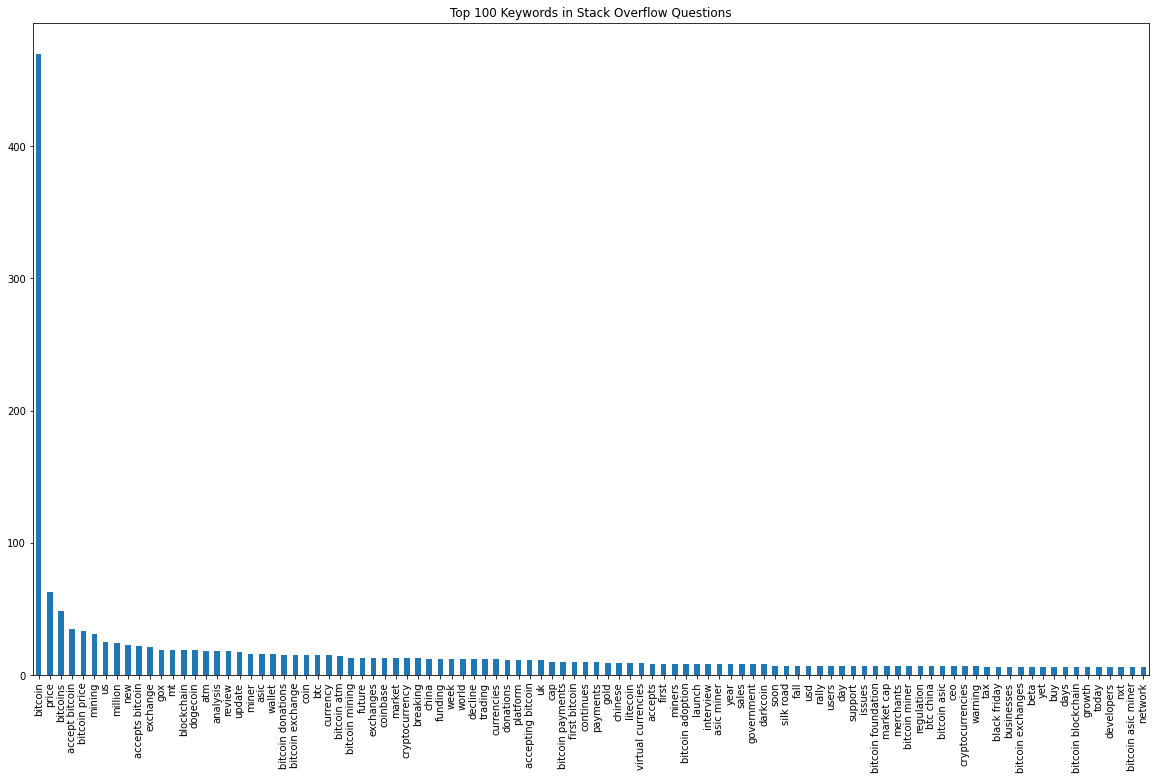

In [15]:
key_df.explode('keywords').keywords.value_counts()[0:100].plot.bar(title='Top 100 Keywords in Stack Overflow Questions', figsize=(20,12))

## Configure NGrams considerd

In [16]:
yake_pipe['yake_keyword_extraction'].setMinNGrams(2)
yake_pipe['yake_keyword_extraction'].setMaxNGrams(4)
key_df = yake_pipe.predict(df)
key_df

,document,keywords,keywords_confidence
0,Bitcoin Price Update: Will China Lead us Down?,bitcoin price,0.7475647452220192
0,Bitcoin Price Update: Will China Lead us Down?,china lead,0.3774989624964526
0,Bitcoin Price Update: Will China Lead us Down?,lead us,0.5619156399368569
0,Bitcoin Price Update: Will China Lead us Down?,china lead us,0.49160495247060043
1,Key Bitcoin Price Levels for Week 51 (15 – 22 ...,key bitcoin,0.7475647452220192
...,...,...,...
1998,Cryptocurrency Exchange Platform AlphaPoint Pa...,bitfinex to support growth,0.3685173882155852
1999,Want to Buy And Sell Bitcoin Fast and Secure? ...,sell bitcoin,0.2923195563311814
1999,Want to Buy And Sell Bitcoin Fast and Secure? ...,bitcoin fast,0.2923195563311814
1999,Want to Buy And Sell Bitcoin Fast and Secure? ...,try coinrnr,0.15815767906792633


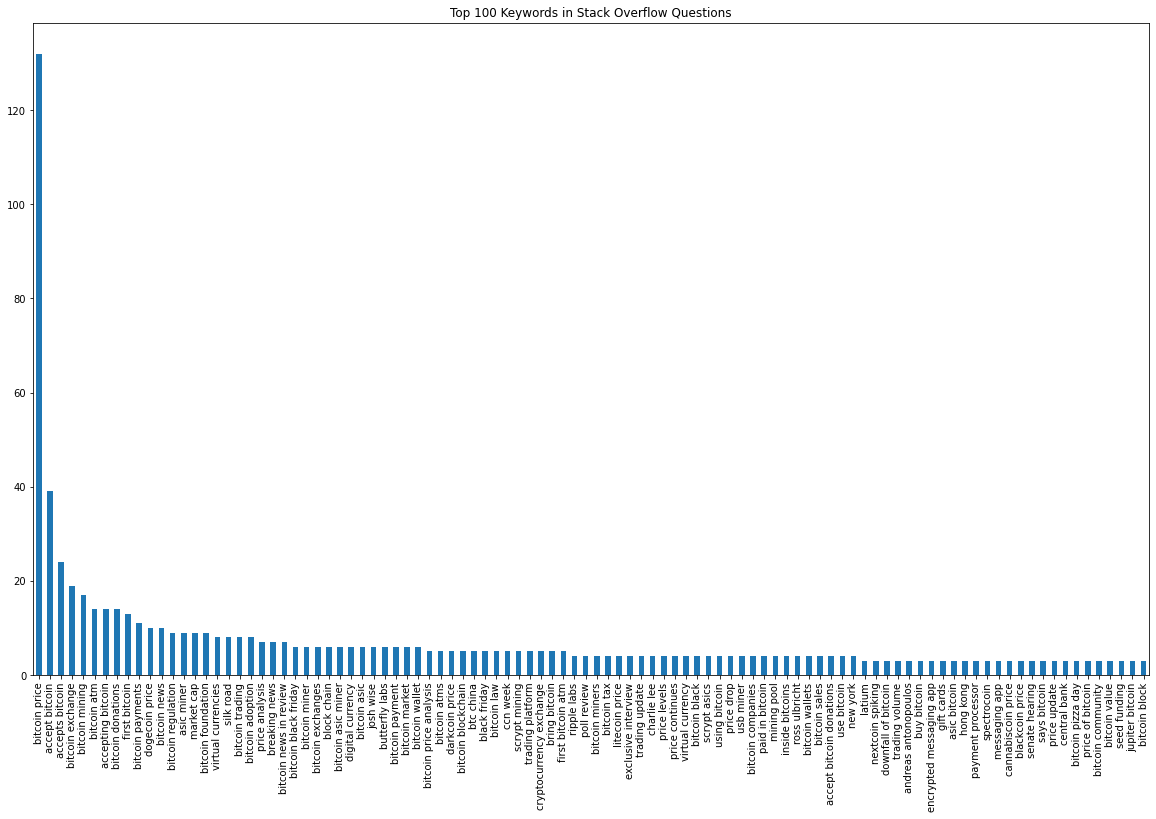

In [17]:
key_df.explode('keywords').keywords.value_counts()[0:100].plot.bar(title='Top 100 Keywords in Stack Overflow Questions', figsize=(20,12))

# Extract **Named Entities**

In [18]:
ner_df = nlu.load('ner').predict(df, output_level='chunk')
ner_df

onto_recognize_entities_sm download started this may take some time.
Approx size to download 160.1 MB
[OK!]


,document,entities_ner,entities_ner_class,entities_ner_confidence,word_embedding_ner
0,Bitcoin Price Update: Will China Lead us Down?,NaN,NaN,NaN,"[[0.8403199911117554, 0.13267000019550323, -0...."
1,Key Bitcoin Price Levels for Week 51 (15 – 22 ...,Week 51 (15 – 22,DATE,0.76498336,"[[-0.22009000182151794, 0.12280000001192093, 0..."
2,"National Australia Bank, Citing Highly Flawed ...",Australia,GPE,0.7144,"[[-0.003313800087198615, 0.3894599974155426, 0..."
3,Chinese Bitcoin Ban Driven by Chinese Banking...,Chinese,NORP,0.9957,"[[0.4327400028705597, 0.3958199918270111, 0.58..."
3,Chinese Bitcoin Ban Driven by Chinese Banking...,Chinese,NORP,0.9437,"[[0.4327400028705597, 0.3958199918270111, 0.58..."
...,...,...,...,...,...
1995,Bitcoin Bill Pay Company Living Room of Satosh...,NaN,NaN,NaN,"[[0.8403199911117554, 0.13267000019550323, -0...."
1996,NYDFS Extends BitLicense Bitcoin Regulation Co...,NaN,NaN,NaN,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1997,Bitfinex Passes Stefan Thomas’s Proof Of Solve...,Bitfinex Passes,PERSON,0.70669997,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1998,Cryptocurrency Exchange Platform AlphaPoint Pa...,NaN,NaN,NaN,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


# Plot Top 100 Named Entities in Crypto Dataset

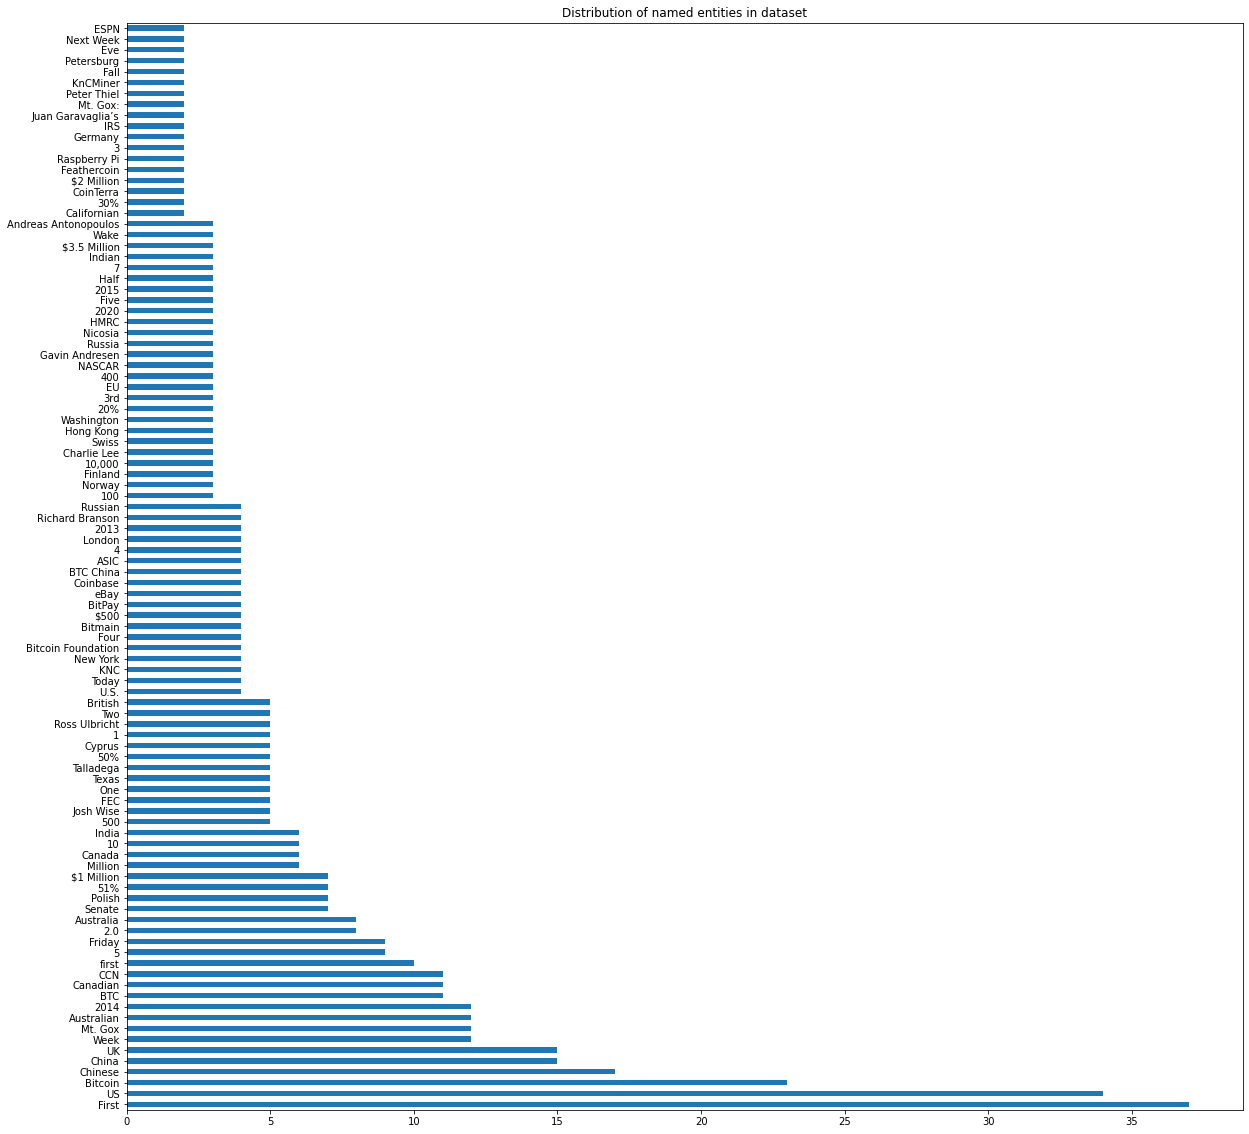

In [21]:
ner_df.entities_ner.value_counts()[:100].plot.barh(title='Distribution of named entities in dataset', figsize=(20,20))

# There 1000+ models in 200+ languages waiting for you to be discoverd and put to good use!
## Checkout [the Modelshub](https://nlp.johnsnowlabs.com/models) and the [NLU Namespace](https://nlu.johnsnowlabs.com/docs/en/spellbook) for more models